In [81]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [87]:
raw_df = pd.read_csv('../../../../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:False,4:True})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
print(df.shape)

df['BareNuclei'] = df['BareNuclei'].astype(np.int)

(683, 11)


In [91]:
X = df[cols[1:-1]]
y = df[cols[-1]]
y=y.astype('int')
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=SEED)
print('X_train: {}, X_test: {}'.format(str(X_train.shape), str(X_test.shape)))
print('Y_train: {}, Y_test: {}'.format(str(y_train.shape), str(y_test.shape)))
scaler = StandardScaler()
scaler.fit(X_train)
col_names=df.columns[1:-1]
scaled_df = pd.DataFrame(X_train, columns=col_names)

X_train: (409, 9), X_test: (274, 9)
Y_train: (409,), Y_test: (274,)


# KNN Model

KNN Score: 0.9014598540145985
{0, 1}
{False, True}


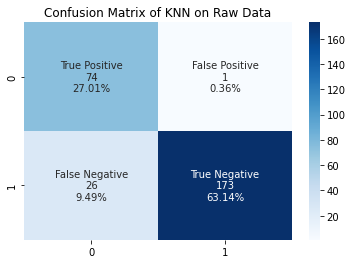

In [92]:
error = []
score_vals = []
for i in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)
    score_vals.append(knn.score(X_test, y_test))

bestIndex = score_vals.index(max(score_vals)) + 1  #Adds one because it starts with 1 neighbor not 0
regressor = KNeighborsRegressor(n_neighbors=bestIndex)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = y_pred == 1
performanceAccuracy = sum(y_pred == y_test)/len(y_test)
print('KNN Score: {}'.format(performanceAccuracy))

print(set(y_test))
print(set(y_pred))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

data = np.array([[tp, fp],[fn, tn]])
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                data.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     data.flatten()/np.sum(data)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


labels = np.asarray(labels).reshape(2,2)
sn.heatmap(data, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix of KNN on Raw Data")
plt.show()

# Naive Bayes Model


NB Score: 0.9744525547445255


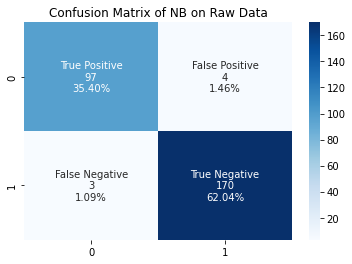

In [93]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = (nb.predict(X_test))

performanceAccuracy = sum(y_pred == y_test)/len(y_test)
print('NB Score: {}'.format(performanceAccuracy))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

data = np.array([[tp, fp],[fn, tn]])
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                data.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     data.flatten()/np.sum(data)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


labels = np.asarray(labels).reshape(2,2)
sn.heatmap(data, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix of NB on Raw Data")
plt.show()

# Logistic Regression


Logistic Regression Score: 0.956140350877193


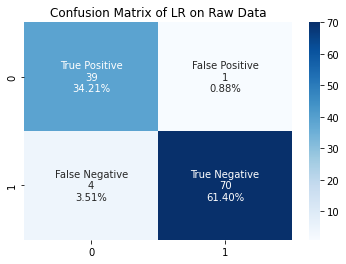

In [ ]:
import warnings #to remove the warnings
warnings.filterwarnings('ignore')


modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)
y_pred = modelLogistic.predict(X_test)

performanceAccuracy = sum(y_pred == y_test)/len(y_test)
print('Logistic Regression Score: {}'.format(performanceAccuracy))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

data = np.array([[tp, fp],[fn, tn]])
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                data.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     data.flatten()/np.sum(data)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


labels = np.asarray(labels).reshape(2,2)
sn.heatmap(data, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix of LR on Raw Data")
plt.show()

# Suppport Vector Machine

Support Vector Machine Score: 0.956140350877193


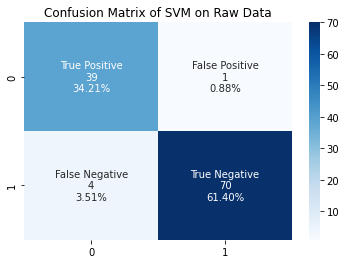

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


performanceAccuracy = sum(y_pred == y_test)/len(y_test)
print('Support Vector Machine Score: {}'.format(performanceAccuracy))


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

data = np.array([[tp, fp],[fn, tn]])
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                data.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     data.flatten()/np.sum(data)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


labels = np.asarray(labels).reshape(2,2)
sn.heatmap(data, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix of SVM on Raw Data")
plt.show()

# Decision Tree


Decision Tree Score: 0.9385964912280702


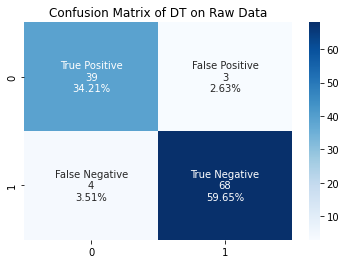

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


performanceAccuracy = sum(y_pred == y_test)/len(y_test)
print('Decision Tree Score: {}'.format(performanceAccuracy))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

data = np.array([[tp, fp],[fn, tn]])
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                data.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     data.flatten()/np.sum(data)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(data, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix of DT on Raw Data")
plt.show()
